<a href="https://colab.research.google.com/github/UsamaGM/AI-ML/blob/main/sentiment_analysis_with_imdb_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install all required libraries

In [ ]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib

## Load Data
### Import Libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence

### Set parameters and load dataset
- VOCAB_SIZE: Total words in our vocabulary
- MAXLEN: Maximum words in a single review
- BATCH_SIZE: Number of inputs in each batch


In [ ]:
VOCAB_SIZE = 88584

MAXLEN = 256
BATCH_SIZE = 32

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

### Preprocess the data
- Make all reviews to have a fixed size of 256 words.
  - If a review has more words then trim it
  - If a review has less words then pad with empty characters (zeros) in the beginning

In [ ]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

## Create and train the model
### Create a model with 3 layers
- First layer for word embeddings outputting 32 dimensional embedded words
- Second Long Term Short Memory layer accepting the 32 dimensional word embeddings
- Last output layer with single node as a review can be either positive or negative

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 128),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         11338752  
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11475009 (43.77 MB)
Trainable params: 11475009 (43.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model
- Used binary_crossentropy as loss function as our model has 2 possible outputs
- Used rmsprop as optimizer function
### Train the model
- Set epochs as 5
- Batch size = 32
- Split train data as 80% for training and 20% for validation

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 41s 62ms/step - loss: 0.4951 - accuracy: 0.7531 - val_loss: 0.3585 - val_accuracy: 0.8508
Epoch 2/5
625/625 [==============================] - 14s 22ms/step - loss: 0.3047 - accuracy: 0.8818 - val_loss: 0.3373 - val_accuracy: 0.8558
Epoch 3/5
625/625 [==============================] - 12s 20ms/step - loss: 0.2452 - accuracy: 0.9076 - val_loss: 0.2938 - val_accuracy: 0.8774
Epoch 4/5
625/625 [==============================] - 10s 17ms/step - loss: 0.1870 - accuracy: 0.9316 - val_loss: 0.2946 - val_accuracy: 0.8734
Epoch 5/5
625/625 [==============================] - 16s 25ms/step - loss: 0.1431 - accuracy: 0.9491 - val_loss: 0.3446 - val_accuracy: 0.8624


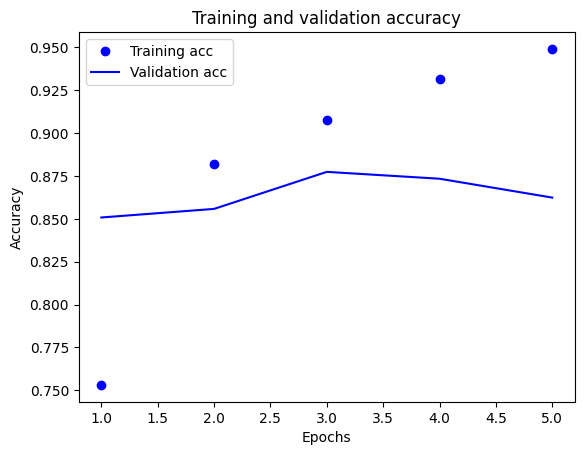

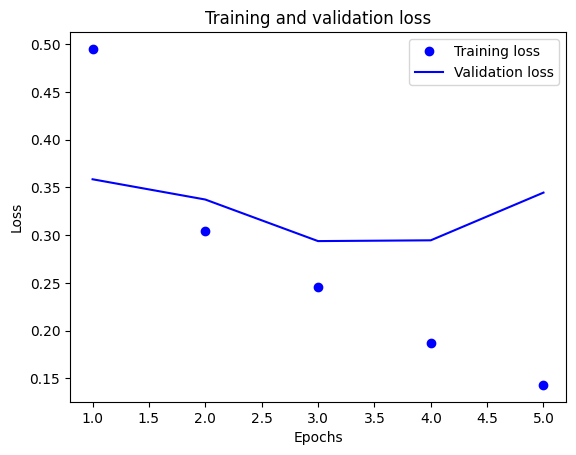

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 6)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluate the model on test data to see how it performs

In [ ]:
results = model.evaluate(test_data, test_labels)

782/782 [==============================] - 5s 7ms/step - loss: 0.3548 - accuracy: 0.8608


# Lets now use our model to make predictions
### Preprocessing the input text
- Before feeding any review to our model, we need to convert the text into word embedding form
- Here I have created a simple method to convert any given text into word embebbing form
- Also, I have created a decode method to convert the encoded data back into simple words

In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_text(integers):
  PAD = 0
  text = ""
  for num in integers:
    if num != PAD:
      text += reverse_word_index[num] + " "
  return text[:-1]

### Lets finally make predictions with our model
- Here I have defined a method which takes text as input, encodes it, performs predictions with model, and prints the result

In [ ]:
def predict(text):
  encoded_text = encode_text(text)
  pred = model.predict(np.expand_dims(encoded_text, 0))[0]

  print(pred)
  if(pred > 0.5):
    print("Positive review")
  else:
    print("Negative review")

In [ ]:
review1 = "Everyone has done a great job with this movie. Really enjoyed it. Definitely recommended to everyone."
predict(review1)

1/1 [==============================] - 0s 364ms/step
[0.8649821]
Positive review


In [ ]:
review2 = "One of the worst movies I have ever watched."
predict(review2)

1/1 [==============================] - 0s 19ms/step
[0.40100977]
Negative review


In [ ]:
review3 = "One of the best movies ever made. Christopher Nolan never disappoints."
predict(review3)

1/1 [==============================] - 0s 19ms/step
[0.7085494]
Positive review


In [ ]:
review3 = "Do not watch this movie, It is a complete waste of time."
predict(review3)

1/1 [==============================] - 0s 25ms/step
[0.17121255]
Negative review


In [ ]:
review4 = "One of the weakest entries in the J-horror remake sweepstakes, One Missed Call is undone by bland performances and shopworn shocks."
predict(review4)

1/1 [==============================] - 0s 19ms/step
[0.30014524]
Negative review


In [ ]:
review5 = "This movie deserves an oscar. What a plot, directions, acting and everything. Go watch this movie and enjoy the drama, suspense and thrill that is packed into this well-done movie."
predict(review5)

1/1 [==============================] - 0s 21ms/step
[0.9174098]
Positive review


In [ ]:
review6 = "Seriously? This is what everyone was waiting for for the past 2 years? Really annoying, cannot even bear a watch."
predict(review6)

1/1 [==============================] - 0s 20ms/step
[0.5489196]
Positive review
